In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [110]:
df = pd.read_csv('bank-full.csv')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Exploratory Data Analysis

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [112]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [113]:
# Removing outliers from the balance column

from scipy.stats import zscore
df1 = df.copy(deep=True)
df1['balance_outliers'] = df['balance']
df1['balance_outliers'] = zscore(df1['balance_outliers'])
condition_1 = (df1['balance_outliers'] > 3) | (df1['balance_outliers'] < -3)
df = df1.drop(df1[condition_1].index, axis = 0, inplace = False)
df = df.drop('balance_outliers', axis = 1)

In [114]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [115]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44466 entries, 0 to 45210
Data columns (total 17 columns):
age          44466 non-null int64
job          44466 non-null object
marital      44466 non-null object
education    44466 non-null object
default      44466 non-null object
balance      44466 non-null int64
housing      44466 non-null object
loan         44466 non-null object
contact      44466 non-null object
day          44466 non-null int64
month        44466 non-null object
duration     44466 non-null int64
campaign     44466 non-null int64
pdays        44466 non-null int64
previous     44466 non-null int64
poutcome     44466 non-null object
Target       44466 non-null object
dtypes: int64(7), object(10)
memory usage: 6.1+ MB


In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [117]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,44466.0,40.882382,10.596139,18.0,33.0,39.0,48.0,95.0
job,44466.0,4.335155,3.278580,0.0,1.0,4.0,7.0,11.0
marital,44466.0,1.167431,0.608986,0.0,1.0,1.0,2.0,2.0
education,44466.0,1.220303,0.747392,0.0,1.0,1.0,2.0,3.0
default,44466.0,0.018284,0.133977,0.0,0.0,0.0,0.0,1.0
balance,44466.0,1084.544483,1721.069271,-6847.0,68.0,431.0,1347.0,10483.0
housing,44466.0,0.558112,0.496617,0.0,0.0,1.0,1.0,1.0
loan,44466.0,0.162034,0.368486,0.0,0.0,0.0,0.0,1.0
contact,44466.0,0.641771,0.898801,0.0,0.0,0.0,2.0,2.0
day,44466.0,15.803558,8.328517,1.0,8.0,16.0,21.0,31.0


In [118]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.021303,-0.402597,-0.108096,-0.017210,0.104874,-0.183683,-0.013781,0.026886,-0.008593,-0.042586,-0.004314,0.005596,-0.023656,0.001154,0.007209,0.024714
job,-0.021303,1.000000,0.061588,0.166671,-0.006783,0.023697,-0.126752,-0.032480,-0.081778,0.022720,-0.093626,0.004381,0.007575,-0.024669,-0.001517,0.011732,0.039850
marital,-0.402597,0.061588,1.000000,0.109488,-0.007200,0.005987,-0.016296,-0.046336,-0.039238,-0.005589,-0.006898,0.011096,-0.010055,0.019078,0.014824,-0.016878,0.044905
education,-0.108096,0.166671,0.109488,1.000000,-0.009906,0.053219,-0.090721,-0.047305,-0.110239,0.022788,-0.058978,0.002136,0.006804,-0.000709,0.017100,-0.018787,0.065578
default,-0.017210,-0.006783,-0.007200,-0.009906,1.000000,-0.097764,-0.006674,0.076197,0.015546,0.009669,0.011663,-0.010104,0.016873,-0.030154,-0.018323,0.035070,-0.022254
balance,0.104874,0.023697,0.005987,0.053219,-0.097764,1.000000,-0.067238,-0.101708,-0.032152,0.010418,0.023445,0.036487,-0.023321,0.013070,0.029837,-0.041787,0.073835
housing,-0.183683,-0.126752,-0.016296,-0.090721,-0.006674,-0.067238,1.000000,0.039549,0.189303,-0.029313,0.273252,0.005576,-0.023247,0.125191,0.037313,-0.100303,-0.138800
loan,-0.013781,-0.032480,-0.046336,-0.047305,0.076197,-0.101708,0.039549,1.000000,-0.011541,0.012006,0.022813,-0.012562,0.010247,-0.022677,-0.010980,0.015063,-0.067868
contact,0.026886,-0.081778,-0.039238,-0.110239,0.015546,-0.032152,0.189303,-0.011541,1.000000,-0.028040,0.364282,-0.021534,0.019246,-0.245103,-0.147440,0.272615,-0.147921
day,-0.008593,0.022720,-0.005589,0.022788,0.009669,0.010418,-0.029313,0.012006,-0.028040,1.000000,-0.009414,-0.030391,0.163769,-0.094159,-0.052084,0.084587,-0.029268


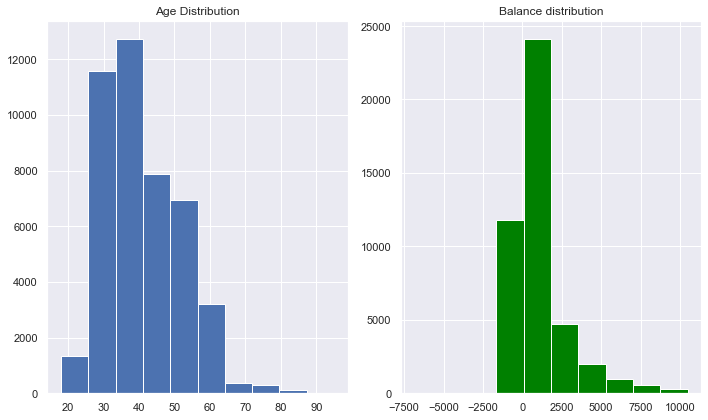

In [119]:
# Plots
figure = plt.figure(figsize=(10,6))
fig1 = figure.add_subplot(1,2,1)
fig2 = figure.add_subplot(1,2,2)
fig1.hist(df['age'])
fig1.set_title('Age Distribution')
fig2.hist(df['balance'], color = 'green')
fig2.set_title('Balance distribution')

plt.tight_layout()

#### Age Distribution: 
We can see that the clients to whom the bank contacted, their age ranges between 20 to more than 80.
Lowest age is 18 and highest is 95
Maximum age group that is targeted is between 30 - 40
The distribution is almost normal distributed with slight deviation.

#### Balance distribution
We can see that balance ranges between -8019 to 102127. The distribution of balance has a huge standard deviation with the mean. The mean value is 1362 and there is a presence of skweness

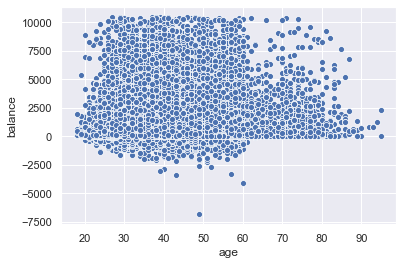

In [120]:
sns.scatterplot(x='age', y='balance', data=df)

Based on this scatter plot not much can be devised. We can observe that above the age of 60, the balance tend to decrease

duration       AxesSubplot(0.125,0.125;0.352273x0.755)
campaign    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

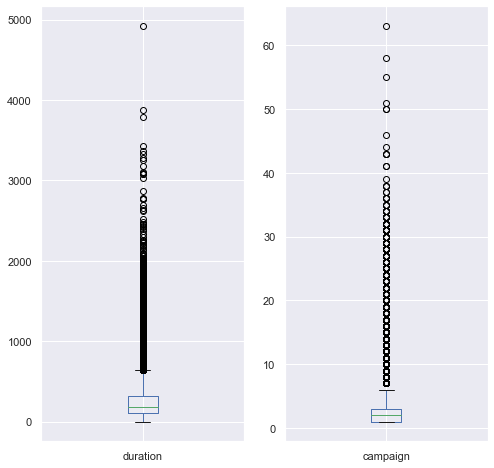

In [121]:
df[['duration', 'campaign']].plot(kind='box', figsize=(8,8), subplots=True, sharex=False, layout=(1,2))

#### Distribution of duration
We can see that the duration has a mean of 258 seconds. The box plot shows data is bit left skewed. There are customers with whom the bank has spent more than 3000 seconds

#### Distribution of campaign
The customers have been contacted between 1 to 3 times. But there are a huge number of outliers which shows that customers have been contacted more than 60 times

Text(0.5, 22.95999999999998, 'Duration')

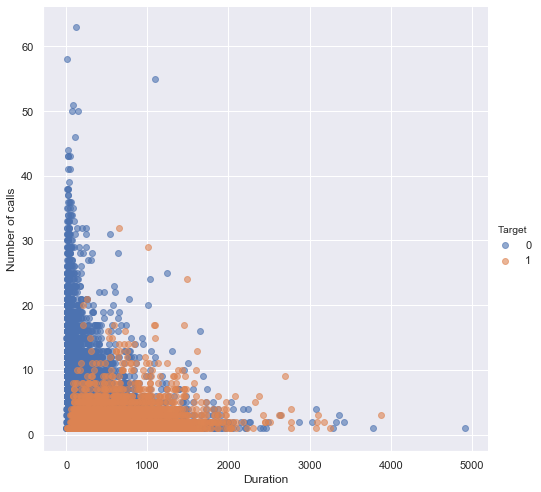

In [122]:
sns.lmplot(x='duration',y='campaign', hue='Target', 
           data=df, fit_reg=False, scatter_kws={'alpha': 0.6},
           height=7)
plt.ylabel('Number of calls')
plt.xlabel('Duration')

#### Distribution of Duration and Campaign
We can see that as the duration increases, the number of people who would be subscribed to the bank product increased
Also, there is a trend that if there are many number of calls performed, the customer didn't subscribe to the bank product.

Also we can say that, the bank must set a limit to the number of calls it makes to persue the client for the product. Since, many calls can lead to a thinking of spam calls.

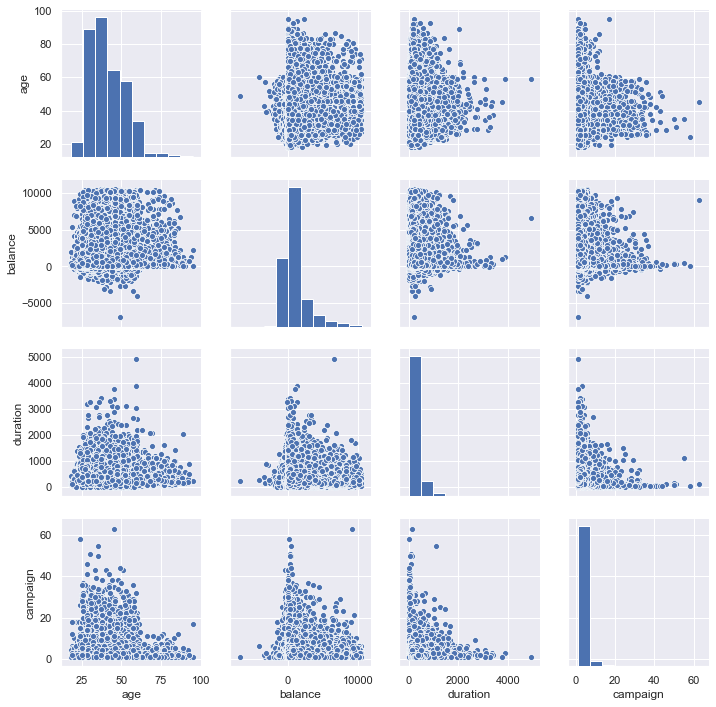

In [123]:
sns.pairplot(df[['age', 'balance', 'duration', 'campaign']])

#### Pair plot
With the pairplot we cannot find any perfect relationship between age, campaign, balance, duration and age

Text(0.5, 1, 'Correlation Matrix')

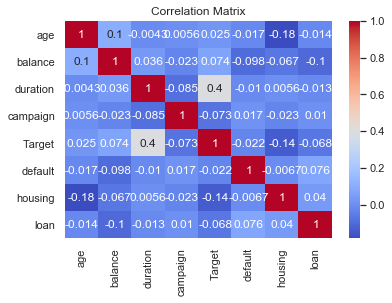

In [124]:
corr_data = df[['age','balance','duration','campaign', 'Target', 'default', 'housing', 'loan']]
corr_data = corr_data.corr()
sns.heatmap(corr_data, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')

#### Correlation matrix and heatmap
We can see that the correlation of various other variables are weak. It is clearly indicated that duration dominates the the target column

In [125]:
# Data Visualization
columns = [df]
for col in columns:
    col.loc[col['age'] < 30, 'age_group'] = 20
    col.loc[(col['age'] >= 30 ) & (col['age'] <40), 'age_group'] = 30
    col.loc[(col['age'] >= 40 ) & (col['age'] <50), 'age_group'] = 40
    col.loc[(col['age'] >= 50 ) & (col['age'] <60), 'age_group'] = 50
    col.loc[(col['age'] >= 60), 'age_group'] = 60

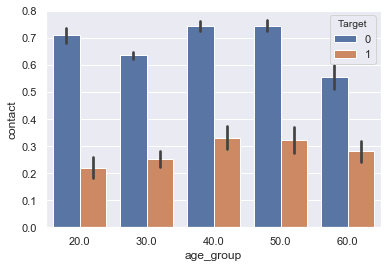

In [126]:
sns.barplot(x='age_group', y='contact', data=df, hue='Target')

#### Barplot
The insights shows that, lesser age (below 30) group and higher age group (above 60) are less interested in bank product than that compared to the middle aged group. Which indicates that young age group do not have enough financial support to make the bank deposit. And higher age group would like to spend more rather than making savings

In [127]:
df[df.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age_group


In [199]:
# Training model
# Dataset has been already cleaned in the earlier steps
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

X = np.array(df.iloc[:,:-2])
y = np.array(df['Target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [236]:
# Decision Tree
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=3)
leafs = [1, 5, 10, 15, 20, 50, 100]
max_leafs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
depth = np.arange(1, 21)
parameters = [{'max_depth': depth, 'max_leaf_nodes': max_leafs}]
model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, cv=cv)
model.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=3, test_size=0.3, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([ 1,  2

In [219]:
y_predict = model.predict(X_test)
model.score(X_test, y_test)

0.9036429053294356

In [205]:
score = cross_val_score(model, cv=cv, X= X, y=y)

In [220]:
print("Decision Tree Accuracy score is %0.2f with standard deviation +/- %f"%(score.mean() * 100, score.std()))

Decision Tree Accuracy score is 90.39 with standard deviation +/- 0.001513


In [207]:
confusion_matrix(y_test, y_predict)

array([[7503,  360],
       [ 497,  534]])

#### Confusion matrix breakdown
The confusion matrix shows that there are about 7503 true predictions and 497 predictions were false negative. Meaning that 703 customers have been identified to opt for the bank term deposit when in actual they haven't opted.

In [208]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7863
           1       0.60      0.52      0.55      1031

    accuracy                           0.90      8894
   macro avg       0.77      0.74      0.75      8894
weighted avg       0.90      0.90      0.90      8894



#### Classification report
The model is highly biased towards the customers who refused to opt for the deposit

Precision of 0 indicates all the instances predicted as no, for which the model has classified as no, which is about 94%
Recall of 0 indicates the clients who said no to the total people people. This is about 95%

In [222]:
# Bagging classifier
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=model, n_estimators = 10, max_samples=0.8, oob_score=True)

In [226]:
model.fit(X_train, y_train)
y_test = model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [229]:
cross_val_score(model, X, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used

array([0.84908588, 0.72210228, 0.35334998])

In [231]:
confusion_matrix(y_test, y_predict)

array([[7895,  263],
       [ 105,  631]])

### Confusion matrix breakdown
The confusion matrix shows that there are about 7895 true predictions and 105 predictions were false negative. Meaning that 703 customers have been identified to opt for the bank term deposit when in actual they haven't opted.

In [232]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8158
           1       0.71      0.86      0.77       736

    accuracy                           0.96      8894
   macro avg       0.85      0.91      0.88      8894
weighted avg       0.96      0.96      0.96      8894



### Classification report
The model is highly biased towards the customers who refused to opt for the deposit

Precision of 0 indicates all the instances predicted as no, for which the model has classified as no, which is about 99% Recall of 0 indicates the clients who said no to the total people people. This is about 97%

Bagging classifer has better classification done for both class than that compared to the decision tree

In [250]:
# ADA Boosting
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth= 15, max_leaf_nodes=50)
model = AdaBoostClassifier(base_estimator= tree,n_estimators=10)
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=15,
                                                         max_features=None,
                                                         max_leaf_nodes=50,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                           

In [251]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9338880143917248

In [256]:
score = cross_val_score(model, X, y, cv=cv)

In [258]:
print("Ada Boosting accuracy is %0.2f with standard deviation %f"%(score.mean(), score.std()))

Ada Boosting accuracy is 0.90 with standard deviation 0.001513


In [252]:
print(confusion_matrix(y_test, y_pred))

[[7808  350]
 [ 238  498]]


### Confusion matrix breakdown
The confusion matrix shows that there are about 7809 true predictions and 238 predictions were false negative. Meaning that 703 customers have been identified to opt for the bank term deposit when in actual they haven't opted.

In [253]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8158
           1       0.59      0.68      0.63       736

    accuracy                           0.93      8894
   macro avg       0.78      0.82      0.80      8894
weighted avg       0.94      0.93      0.94      8894



### Classification report
The model is highly biased towards the customers who refused to opt for the deposit

Precision of 0 indicates all the instances predicted as no, for which the model has classified as no, which is about 97% Recall of 0 indicates the clients who said no to the total people people. This is about 96%

Bagging classifer has better classification done for both class than that compared to the Ada Boosting

In [265]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=50, max_depth=10)
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [266]:
y_pred = model.predict(X_test)

In [267]:
score = cross_val_score(estimator=model, X=X, y=y, cv = cv)

In [268]:
print("Gradient Boostin score is %0.2f with standard deviation %f"%(score.mean(), score.std()))

Gradient Boostin score is 0.90 with standard deviation 0.001382


In [269]:
print(confusion_matrix(y_test, y_pred))

[[7942  216]
 [ 161  575]]


### Confusion matrix breakdown
The confusion matrix shows that there are about 7942 true predictions and 161 predictions were false negative. Meaning that 161 customers have been identified to opt for the bank term deposit when in actual they haven't opted.

In [271]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8158
           1       0.73      0.78      0.75       736

    accuracy                           0.96      8894
   macro avg       0.85      0.88      0.86      8894
weighted avg       0.96      0.96      0.96      8894



### Classification report
The model is highly biased towards the customers who refused to opt for the deposit

Precision of 0 indicates all the instances predicted as no, for which the model has classified as no, which is about 98% 
Recall of 0 indicates the clients who said no to the total people people. This is about 97%

Both Bagging classifier and Gradient boosting perform well. Bagging technique has bit higher rate of f1 score than that of Gradient Boosting

In [287]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=20, max_leaf_nodes=50)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [288]:
y_pred = model.predict(X_test)

In [279]:
score = cross_val_score(estimator=model, cv=cv, X=X, y=y)

In [280]:
print("Random Forest score is %0.2f with standard deviation %f"%(score.mean(), score.std()))

Random Forest score is 0.90 with standard deviation 0.001087


In [289]:
print(confusion_matrix(y_test, y_pred))

[[8148   10]
 [ 534  202]]


### Confusion matrix breakdown
The confusion matrix shows that there are about 8148 true predictions and 512 predictions were false negative. Meaning that 534 customers have been identified to opt for the bank term deposit when in actual they haven't opted.

In [290]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8158
           1       0.95      0.27      0.43       736

    accuracy                           0.94      8894
   macro avg       0.95      0.64      0.70      8894
weighted avg       0.94      0.94      0.92      8894



### Classification report
The model is highly biased towards the customers who refused to opt for the deposit

Precision of 0 indicates all the instances predicted as no, for which the model has classified as no, which is about 95% Recall of 0 indicates the clients who said no to the total people people. This is about 100%